# Практическое задание 2 (часть 1)

# Определение частей речи с помощью скрытой марковской модели

## курс "Математические методы анализа текстов"

### ФИО: АМИНОВ ТИМУР ВЕНЕРОВИЧ

## Введение

### Постановка задачи

В данной лабораторной работе вам предстоит обучить скрытую марковскую модель на размеченных данных и реализовать алгоритм Витерби для задачи POS-теггинга (определение частей речи слов в тексте), а также ознакомиться с использованием  ряда POS-теггеров из библиотеки NLTK.

### Комментарии и советы

1. Для выполнения потребуются модули Python numpy, nltk.

2. Все необходимые для выполнения задания данные либо приложены, либо могут быть скачаны с помощью nltk.download().

3. Посмотреть параметры конструктора и других методов классов можно набрав и выполнив в ячейке с кодом '?full_method_name'.

### Задача определения частей речи (POS)

Мы будем решать задачу определения частей речи (POS-теггинга) с помощью скрытой марковской модели (HMM). Формула совместной плотности наблюдаемых и скрытых переменных задается как

$$ p(x, t) = p(t) p(x|t) = p(t_1)  \prod_{i=2}^{N_x} p(t_i|t_{i-1}) \prod_{i=1}^{N_x} p(x_i|t_i)$$

#### Переменные модели

- наблюдаемые переменные $X$ - словарь корпуса;

- скрытые переменные $T$ - множество POS-тегов.

- x - одно предложение, $N_x$ - длина предложения

- t - теги одного предложения, $N_t$ - длина вектора меток

#### Параметры модели

- матрица вероятностей переходов $A \in \mathbb{R}^{|T| \times |T|}$, $A_{ij} = p(t_s=i|t_{s-1}=j) \; \forall s$

- матрица выходных вероятностей $B \in \mathbb{R}^{|X| \times |T|}$, $B_{ij} = p(x_s =i|t_s =j) \; \forall s$

- вектор начальных вероятностей $C \in \mathbb{R}^{|T|}$, $C_i = p(t_1=i)$


#### Обучение модели

* Для обучения параметров $A$ и $B$ используется метод максимума правдоподобия. Оценки вычисляются на основе частот совстречаемости тегов и тегов со словами ():

$$a_{ij} = \frac{\sum_{t}\sum_{s=2}^{N_t} \mathbb{I}[t_{s} = i, t_{s - 1} = j]}{\sum_{t}\sum_{s=2}^{N_t} \mathbb{I}[t_{s} = j]}$$

$$b_{ij} = \frac{\sum_{t, x}\sum_{s=1}^{N_t} \mathbb{I}[x_{s} = i, t_{s} = j]}{\sum_{t, x}\sum_{s=1}^{N_t} \mathbb{I}[t_{s} = j]}$$

* Параметры $C$ можно аналогично вычислять по частотам или считать распределение $p(t_1)$ равномерным

#### Применение модели

Применение модели на новых данных реализуется с помощью алгоритма Витерби.Это алгоритм динамиеского программирования, с помощью которого мы будем находить наиболее вероятную последовательность скрытых состояний модели для фиксированной последовательности слов:

$$ \hat{t} = \arg \max_{t} p(t|x) = \arg \max_{t} p(x, t) $$

Определим функцию, определяющую максимальную вероятность последовательности, заканчивающейся на $i$-ой позиции в состоянии $k$:

$$\delta(k, i) = \max_{t_1, \dots t_{i-1}} p(x_1, \dots x_i, t_1, \dots t_i=k)$$

Тогда $\max_{k} \delta(k, N_x)$ - максимальная вероятность всей последовательности. А состояния, на которых эта вероятность достигается - ответ задачи.

Алгоритм Витерби заключается в последовательном пересчете функции $\delta(k, i)$ по формуле:

$$\delta(k, i) = \max_{m} \delta(m, i-1) p(t_i = k|t_{i-1} = m) p(x_i|t_i=k) $$

Аналогично пересчитывается функция, определяющая, на каком состоянии этот максимум достигается:

$$s(k, i) = \arg \max_{m} \delta(m, i-1) p(t_i = k|t_{i-1} = m) p(x_i|t_i=k) $$


На практике это означает заполнение двумерных массивов размерности: (длина последовательности) $\times$ (количество возможных состояний). Когда массивы заполнены, $\arg \max_{k} \delta(k, N_x)$ говорит о последнем состоянии. Начиная с него можно восстановить все состояния по массиву $s$. 

Осталось уточнить, как стартовать последовательный пересчет (чем заполнить первый столбец массива вероятностей):

$$\delta(k, 1) = p(k) p(x_1|t_1=k)$$

Подробнее о HMM можно прочитать по [ссылке](https://web.stanford.edu/~jurafsky/slp3/A.pdf)

## Часть 1. Загрузка корпуса (1 балл)

Загрузите brown корпус с универсальной системой тегирования. Для этого вам понадобятся ресурсы brown и universal_tagset из nltk.download().  

Так как каждый конкретный датасет может использовать свою систему тегов, в NLTK предусмотрено универсальное множество тегов и возможность приведения к нему других систем. Это множество включает в себя следующие теги:


- ADJ - adjective (new, good, high, ...)
- ADP - adposition	(on, of, at, ...)
- ADV - adverb	(really, already, still, ...)
- CONJ	- conjunction	(and, or, but, ...)
- DET - determiner, article	(the, a, some, ...)
- NOUN	- noun	(year, home, costs, ...)
- NUM - numeral	(twenty-four, fourth, 1991, ...)
- PRT -	particle (at, on, out, ...)
- PRON - pronoun (he, their, her, ...)
- VERB - verb (is, say, told, ...)
- .	- punctuation marks	(. , ;)
- X	- other	(ersatz, esprit, dunno, ...)

Обратите внимание, что тегсеты в корпусах текстов и в различных теггерах могут быть разными. Проверять это можно, глядя на сами теги, а симптом - подозрительно низкое качество теггирования. В таких случаях рекомендуется всё приводить сперва к универсальному тегсету, а потом уже мерять качество. Полезной может оказаться эта ссылка http://www.nltk.org/_modules/nltk/tag/mapping.html

In [16]:
import nltk 
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
from nltk.corpus import brown 

brown_tagged_sents = brown.tagged_sents(tagset="universal")

# you code here

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Тимур\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Тимур\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Тимур\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [17]:
from __future__ import print_function, unicode_literals, division
from collections import defaultdict
from os.path import join
from nltk.data import load

_UNIVERSAL_DATA = "taggers/universal_tagset"
_UNIVERSAL_TAGS = (
    'VERB',
    'NOUN',
    'PRON',
    'ADJ',
    'ADV',
    'ADP',
    'CONJ',
    'DET',
    'NUM',
    'PRT',
    'X',
    '.',
)

_MAPPINGS = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: 'UNK')))


# обратите внимание 
- я не знаю что произошло но в последний момент я решил перезапустить ноутбук и посмотреть как оно работает 
- и оно не заработало хотя работало и я не успел исправить
- если получится починить отправлю после дедлайна 


In [19]:
def _load_universal_map(fileid):
    contents = load(join(_UNIVERSAL_DATA, fileid + '.map'), format="text")

    # When mapping to the Universal Tagset,
    # map unknown inputs to 'X' not 'UNK'
    _MAPPINGS[fileid]['universal'].default_factory = lambda: 'X'

    for line in contents.splitlines():
        line = line.strip()
        if line == '':
            continue
        fine, coarse = line.split('\t')

        assert coarse in _UNIVERSAL_TAGS, 'Unexpected coarse tag: {}'.format(coarse)
        assert (
            fine not in _MAPPINGS[fileid]['universal']
        ), 'Multiple entries for original tag: {}'.format(fine)

        _MAPPINGS[fileid]['universal'][fine] = coarse
        
        
def tagset_mapping(source, target):
    """
    Retrieve the mapping dictionary between tagsets.

    >>> tagset_mapping('ru-rnc', 'universal') == {'!': '.', 'A': 'ADJ', 'C': 'CONJ', 'AD': 'ADV',\
            'NN': 'NOUN', 'VG': 'VERB', 'COMP': 'CONJ', 'NC': 'NUM', 'VP': 'VERB', 'P': 'ADP',\
            'IJ': 'X', 'V': 'VERB', 'Z': 'X', 'VI': 'VERB', 'YES_NO_SENT': 'X', 'PTCL': 'PRT'}
    True
    """

    if source not in _MAPPINGS or target not in _MAPPINGS[source]:
        if target == 'universal':
            _load_universal_map(source)
            # Added the new Russian National Corpus mappings because the
            # Russian model for nltk.pos_tag() uses it.
            _MAPPINGS['ru-rnc-new']['universal'] = {
                'A': 'ADJ',
                'A-PRO': 'PRON',
                'ADV': 'ADV',
                'ADV-PRO': 'PRON',
                'ANUM': 'ADJ',
                'CONJ': 'CONJ',
                'INTJ': 'X',
                'NONLEX': '.',
                'NUM': 'NUM',
                'PARENTH': 'PRT',
                'PART': 'PRT',
                'PR': 'ADP',
                'PRAEDIC': 'PRT',
                'PRAEDIC-PRO': 'PRON',
                'S': 'NOUN',
                'S-PRO': 'PRON',
                'V': 'VERB',
            }

    return _MAPPINGS[source][target]

def map_tag(source, target, source_tag):
    """
    Maps the tag from the source tagset to the target tagset.

    >>> map_tag('en-ptb', 'universal', 'VBZ')
    'VERB'
    >>> map_tag('en-ptb', 'universal', 'VBP')
    'VERB'
    >>> map_tag('en-ptb', 'universal', '``')
    '.'
    """

    # we need a systematic approach to naming
    if target == 'universal':
        if source == 'wsj':
            source = 'en-ptb'
        if source == 'brown':
            source = 'en-brown'

    return tagset_mapping(source, target)[source_tag]

In [21]:
brown_tagged_sents

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

In [7]:
def brown_data():
    """return the text_length first tokens of the brown corpus tagged in pyrata format"""
    tokens = brown.words()
    tokens = tokens[:20]

    pos_tags = nltk.pos_tag(tokens)

    return [{'raw':w, 'pos':p} for (w, p) in pos_tags]

In [8]:
brown_data()

[{'raw': 'The', 'pos': 'DT'},
 {'raw': 'Fulton', 'pos': 'NNP'},
 {'raw': 'County', 'pos': 'NNP'},
 {'raw': 'Grand', 'pos': 'NNP'},
 {'raw': 'Jury', 'pos': 'NNP'},
 {'raw': 'said', 'pos': 'VBD'},
 {'raw': 'Friday', 'pos': 'NNP'},
 {'raw': 'an', 'pos': 'DT'},
 {'raw': 'investigation', 'pos': 'NN'},
 {'raw': 'of', 'pos': 'IN'},
 {'raw': "Atlanta's", 'pos': 'NNP'},
 {'raw': 'recent', 'pos': 'JJ'},
 {'raw': 'primary', 'pos': 'JJ'},
 {'raw': 'election', 'pos': 'NN'},
 {'raw': 'produced', 'pos': 'VBD'},
 {'raw': '``', 'pos': '``'},
 {'raw': 'no', 'pos': 'DT'},
 {'raw': 'evidence', 'pos': 'NN'},
 {'raw': "''", 'pos': "''"},
 {'raw': 'that', 'pos': 'WDT'}]

Проанализируйте данные, с которыми Вы работаете. В частности, ответьте на вопросы:
- Каков общий объем датасета, формат?
- Приведены ли слова к нижнему регистру? Чем  это нам может в дальнейшем помешать?
- Как распределены слова в корпусе?  Как распределены теги в корпусе? Подсчитайте частоты и отобразите любым удобным для Вас способом. Проинтерпретируйте полученные результаты.

In [22]:
len(brown_tagged_sents)

57340

In [24]:
brown_tagged_sents[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

- brown_tagged_sents - лист листов по предложениям, для каждого слова кортеж из слова и части речи
- слова не преведены к нижнему регистру и оставлены знаки препинания. Это помешает нам так как слова с заглавными буквами  и  дез них будут считаться разными 

Cделайте случайное разбиение выборки на обучение и контроль в отношении 9:1.Если впоследствии обучение моделей будет занимать слишком много времени, работайте с подвыборкой, например, только текстами определенных категорий.

In [29]:
def counter(data):
    dict_tags  = {}
    dict_words  = {}
    dict_tags_words = {}
    for sentence in data:
        for word in sentence:
            
            if word in dict_tags_words: 
                dict_tags_words[word] += 1
            else:
                dict_tags_words[word] = 1
                
            if word[1] in dict_tags:
                 dict_tags[word[1]] += 1
            else:
                dict_tags[word[1]] = 1
                
            if word[0] in dict_words:
                dict_words[word[0]] += 1
            else:
                dict_words[word[0]] = 1
    return (dict_tags , dict_words, dict_tags_words)

In [31]:
dict_tags, dict_words, dict_tags_words = counter(brown_tagged_sents)

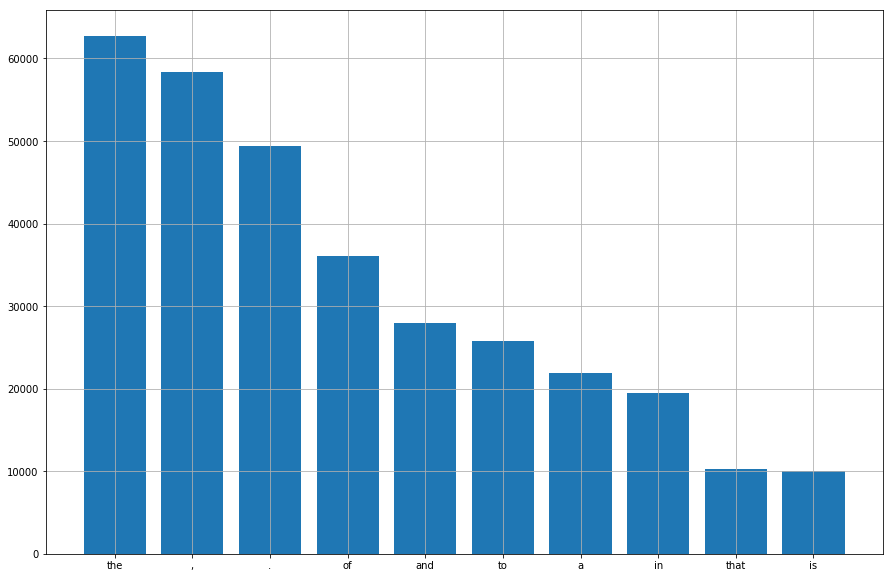

In [39]:
import matplotlib.pyplot as plt 

l = sorted(zip(list(dict_words.values()), list(dict_words.keys())), reverse=True)
elements_lower = []
labels  = []
for element in l:
    elements_lower.append(element[0])
    labels.append(element[1])

x = np.arange(len(dict_words))[:10]
fig = plt.figure(figsize = (15, 10))
plt.bar(x, elements_lower[:10],width = 0.8, linewidth = 2)
plt.xticks(x, tuple(labels))
plt.grid()
plt.show()

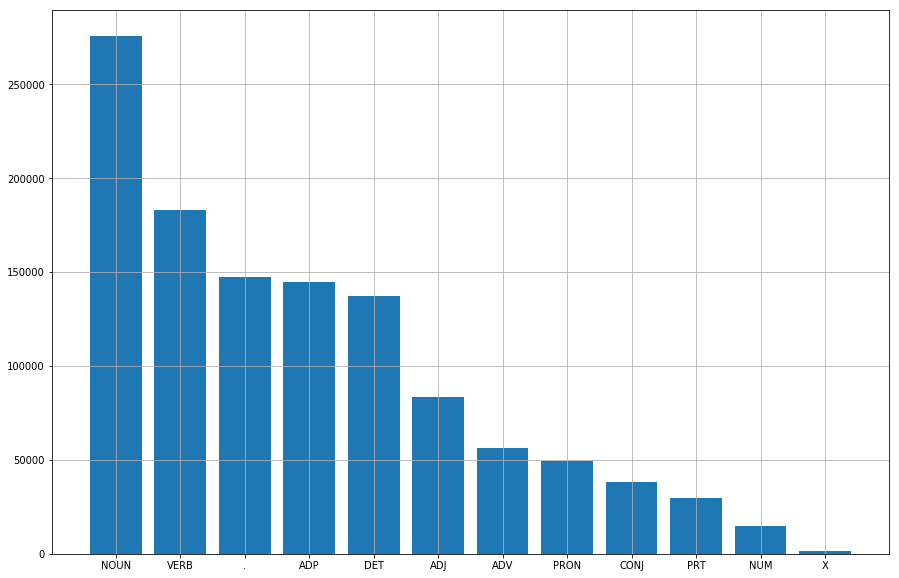

In [36]:
l = sorted(zip(list(dict_tags.values()), list(dict_tags.keys())), reverse=True)
elements_lower = []
labels  = []
for element in l:
    elements_lower.append(element[0])
    labels.append(element[1])

x = np.arange(len(dict_tags))[:50]
fig = plt.figure(figsize = (15, 10))
plt.bar(x, elements_lower[:50],width = 0.8, linewidth = 2)
plt.xticks(x, tuple(labels))
plt.grid()
plt.show()

In [44]:
import random
tagged_sents = list(brown_tagged_sents)
random.shuffle(tagged_sents)
train = tagged_sents[: int(0.9 * len(tagged_sents))]
test = tagged_sents[int(0.9 * len(tagged_sents)) :]

## Часть 2. Скрытая марковская модель (4 балла) 

### Метод максимального правдоподобия для обучения модели

Требуется построить скрытую марковскую модель (class HiddenMarkovModel) и написать метод fit для настройки всех её параметров с помощью оценок максимального правдоподобия по размеченным данным (последовательности пар слово+тег):

- Вероятности переходов между скрытыми состояниями $p(t_i | t_{i - 1})$ посчитайте на основе частот биграмм POS-тегов.

- Вероятности эмиссий наблюдаемых состояний $p(x_i | t_i)$ посчитайте на основе частот "POS-тег - слово".

- Обратите внимание на проблему разреженности счетчиков и сделаейте все вероятности сглаженными по Лапласу ([add-k smoothing](https://en.wikipedia.org/wiki/Additive_smoothing)).

- Распределение вероятностей начальных состояний $p(t_1)$ задайте равномерным.


### Алгоритм Витерби для применения модели

Требуется написать метод .predict для определения частей речи на тестовой выборке. Чтобы использовать обученную модель на новых данных, необходимо реализовать алгоритм Витерби. 

В реализации рекомендуется перейти к логарифмам, т.к. произведение большого числа маленьких вероятностей может приводить к вычислительным ошибкам.

In [50]:
class HiddenMarkovModel:    
    def __init__(self, k_smoothing=1.0):
        """
        k_smoothing : float, constant in add-k-smoothing
        """
        self.k_smoothing = k_smoothing
        self.cpd_tags = None
        self.cpd_tagwords = None
        self.tags = None
        
    def fit(self, train_tokens_tags_list):
        """
        Fit the model using maximum likelihood method.
        
        train_tokens_tags_list: list of list of pairs (token, tag) 
        """
        
        tags_words = []
        for sentence in train_tokens_tags_list:
            tags_words.append(('№', '№')) #START
            tags_words.extend([(tag, word) for (word, tag) in sentence])
            tags_words.append(('#', '#')) #END
        
        self.tags = set(tag for (word, tag) in tags_words)
        tags_list = [tag for (tag, word) in tags_words]
        
    
        cfd_tagwords = nltk.ConditionalFreqDist(tags_words) #частоты пар (pos - word)
        self.cpd_tagwords = nltk.ConditionalProbDist(cfd_tagwords, nltk.MLEProbDist) #MLP
        
        
        
        cfd_tags= nltk.ConditionalFreqDist(nltk.bigrams(tags_list))     #частоты биграмм 
        self.cpd_tags = nltk.ConditionalProbDist(cfd_tags, nltk.MLEProbDist)#MLP
    

    def predict(self, test):
        """
        Return predictions for test_tokens_list using viterbi algorithm.
        
        test_tokens_list : list of list of tokens
        
        return: list of list of tags
        
        """
        tags = self.tags
        answer_list = []

        for j in range(len(test)):
        
            sentence = test[j]
            delta =[]
            s = []              
            delta_start = {}
            s_start = {}
            for k in tags:
                delta_start[k] = self.cpd_tags['№'].prob(k) * self.cpd_tagwords[k].prob(sentence[0])
                s_start[k] = '№'
            delta.append(delta_start)
            s.append(s_start)
  
    
            
            for i in range(1, len(sentence)):
                word = sentence[i]
                delta_step = {}
                s_step = {}
                delta_last_step = delta[-1] 
                for k in tags:  
                    m_max = ''
                    maximum = -1
                                    
                    for m in delta_last_step.keys(): 
                        d = delta_last_step[m] * self.cpd_tags[m].prob(k) * self.cpd_tagwords[k].prob(word)
                        if d > maximum:
                            m_max = m
                            maximum = d
                    delta_step[k] = delta_last_step[m_max] * self.cpd_tags[m_max].prob(k) * self.cpd_tagwords[k].prob(word)
                    s_step[k] = m_max 
                delta.append(delta_step)
                s.append(s_step)
            delta_last_step = delta[-1]
            for m in delta_last_step.keys(): 
                d = delta_last_step[m] * self.cpd_tags[m].prob('#')
                if d > maximum:
                    m_max = m
                    maximum = d
            answer = [m_max]
            s.reverse()
            for j in s:
                answer.append(j[m_max])
                m_max = j[m_max]

            answer.reverse()
            answer_tuple = []
       
            for t in range(len(answer) - 1):
                x = answer[t + 1]
                answer_tuple.append(tuple((sentence[t], x)))
    
            answer_list.append(answer_tuple)
        
        return answer_list

Обучите скрытую марковскую модель:

In [51]:
model = HiddenMarkovModel()
model.fit(train_tokens_tags_list = train)

Проверьте работу реализованного алгоритма на следующих модельных примерах, проинтерпретируйте результат.

- 'he can stay'
- 'a milk can'
- 'i saw a dog'
- 'an old saw'

In [54]:
print('he can stay:')
for i in model.predict(['he can stay'.split()])[0]:
    print(i[1])

he can stay:


KeyboardInterrupt: 

In [ ]:
print("i saw a dog:")
for i in model.predict(["i saw a dog".split()])[0]:
    print(i[1])

In [ ]:
print("I saw a dog:")
for i in model.predict(["I saw a dog".split()])[0]:
    print(i[1])

In [ ]:
print("an old saw:")
for i in model.predict(["an old saw".split()])[0]:
    print(i[1])

# я не смог реализовать через фит предикт вот мой ответ((

In [61]:

from collections import Counter, defaultdict

import numpy as np


def train_hmm(tagged_sents):
    """
    Calucaltes p(tag), p(word|tag), p(tag|tag) from corpus.

    Args:
        tagged_sents: list of list of tagged tokens. 
            Example: 
            [[('dog', 'NOUN'), ('eats', 'VERB'), ...], ...]

    Returns:
        p_t, p_w_t, p_t_t - tuple of 3 elements:
        p_t - dict(float), tag -> proba
        p_w_t - dict(dict(float), tag -> word -> proba
        p_t_t - dict(dict(float), previous_tag -> tag -> proba
    """
    alpha=1e-24
    counter_tag = Counter()
    counter_tag_tag = Counter()
    counter_tag_word = Counter()
    tags = set()
    words = set()
    p_t_t = defaultdict(dict)
    p_w_t = defaultdict(dict)
    pt = dict()
    for tagged_sent in tagged_sents:
        i = 0
        for tagged_word in tagged_sent:
            words.add(tagged_word[0])
            tags.add(tagged_word[1])
            counter_tag_word[tuple(tagged_word)] += 1
            counter_tag[tagged_word[1]] += 1
            if i < len(tagged_sent) - 1:
                counter_tag_tag[(tagged_sent[i][1], tagged_sent[i+1][1])] += 1
            i += 1
    for tag in tags:
        p_t_t[tag] = defaultdict(float)
        p_w_t[tag] = defaultdict(float)
        pt[tag] = 1. / len(tags)
    for (prev, cur), count in counter_tag_tag.items():
        p_t_t[prev][cur] = (count + alpha) / (counter_tag[prev] + alpha * len(tags))
    for (word, tag), count in counter_tag_word.items():
        p_w_t[tag][word] = (count + alpha) / (counter_tag[tag] + alpha * (len(tags) + len(words)))
    return pt, p_w_t, p_t_t

In [62]:
pt, p_w_t, p_t_t = train_hmm(train)

In [63]:
def viterbi_algorithm(test_tokens_list, p_t, p_w_t, p_t_t):
 
    result = []
    pos = list(p_t.keys())
    s = np.zeros([len(p_t), len(test_tokens_list)], dtype=np.int)
    delta = np.zeros([len(p_t), len(test_tokens_list)])
    for i in range(len(p_t)):
        delta[i][0] = np.log(max(10 ** (-100), p_t[pos[i]])) + \
                      np.log(max(10 ** (-100), p_w_t[pos[i]][test_tokens_list[0]]))
    for i in range(1, len(test_tokens_list)):
        for j in range(delta.shape[0]):
            delta[j][i] = -10 ** 49
            for k in range(delta.shape[0]):
                cur_proba = delta[k][i-1] + np.log(max(p_t_t[pos[k]][pos[j]], 10 ** (-100))) + \
                            np.log(max(10 ** (-100), p_w_t[pos[j]][test_tokens_list[i]]))
                if delta[j][i] < cur_proba:
                    delta[j][i] = cur_proba
                    s[j][i] = k
    x = np.argmax(delta[:, delta.shape[1] - 1:])
    result.append(pos[x])
    for i in range(1, delta.shape[1]):
        x = s[x][s.shape[1] - i]
        result.append(pos[x])
    return list(reversed(result))

In [142]:
viterbi_algorithm('he can stay'.split(" "), pt, p_w_t, p_t_t)

['PRON', 'VERB', 'VERB']

In [143]:
viterbi_algorithm('a milk can'.split(" "), pt, p_w_t, p_t_t)

['DET', 'NOUN', 'VERB']

In [144]:
viterbi_algorithm('i saw a dog'.split(" "), pt, p_w_t, p_t_t)

['NOUN', 'VERB', 'DET', 'NOUN']

In [145]:
viterbi_algorithm('an old saw'.split(" "), pt, p_w_t, p_t_t)

['DET', 'ADJ', 'VERB']

Примените модель к отложенной выборке Брауновского корпуса и подсчитайте точность определения тегов (accuracy). Сделайте выводы. 

In [65]:

accur = []
for j in range(100):
    test_tokens_list = []
    for word in test[j]:
        test_tokens_list.append(word[0])
    tags = viterbi_algorithm(test_tokens_list, pt, p_w_t, p_t_t)
    correct_count = 0
    for i in range(len(tags)):
        if tags[i] == test[j][i][1]:
            correct_count += 1
    accur.append(1. * correct_count / len(test[j]))
print(accur[0: 10])

[1.0, 1.0, 0.9428571428571428, 0.8181818181818182, 1.0, 1.0, 0.96875, 1.0, 0.9696969696969697, 1.0]


## Бонусная часть. Сравнение с готовыми POS-теггерами из NLTK (2 балла)

В прошлом пункте Вы реализовали свой POS-тегер на основе скрытой марковской модели. Теперь сравните его работу с готовыми средставми, доступными в библиотеке NLTK: http://www.nltk.org/api/nltk.tag.html

Сравните с вашей моделью любые из 4-х теггеров, представленных ниже.

При проведении экспериментов обращайте внимание на следующие моменты (и отразите их в отчете):
- Какой подход лежит в основе теггера
- На каких данных он обучен (если Вы скачали готовую модель)
- Сколько времени занимает обучение на brown корпусе (если обучаете сами)
- Какая точность получается на контролькой выборке

Сформируйте рекоммендиции о том, какую технологию Вы бы использовали, если встретитесь с задачей определения частей речи в будущем.

In [ ]:
import nltk
from nltk.tag.mapping im
port map_tag

In [87]:
def to_uni(answer):
    for sent in range(len(answer)):
        for word in range(len(answer[sent])):
            L = list(answer[sent][word])
            L[1] = map_tag('en-ptb', 'universal', L[1])
            answer[sent][word] = tuple(L)
    return answer

In [94]:
def accur(answer, test_sents):
    r = 0
    s = 0
    for sent in range(len(answer)):
        s = s + len(answer[sent])
        for word in range(len(answer[sent])):
            if answer[sent][word][1] == test_sents[sent][word][1]:
                r = r + 1
    return r / s

### 1. DefaultTagger
Простая заглушка, ставящая всем словам один и тот же pos-тег. Очевидно, для максимизации качества, мы хотим выбрать самую частотную метку из всех меток обучающей выборки, т.е. метку 'NOUN'.

In [95]:
from nltk.tag import DefaultTagger
default_tagger = DefaultTagger(u'NOUN')
print(default_tagger.tag(test[1000]))
answer_def = default_tagger.tag_sents(test)
default_tagger.evaluate(test)
accur(answer_def, test)
# your code here

[(('Which', 'DET'), 'NOUN'), (('theory', 'NOUN'), 'NOUN'), (('is', 'VERB'), 'NOUN'), (('more', 'ADV'), 'NOUN'), (('fantastic', 'ADJ'), 'NOUN'), ((':', '.'), 'NOUN'), (('1', 'NUM'), 'NOUN'), (('.', '.'), 'NOUN')]


0.23597417589465133

### 2. RegexpTagger

Теггер, который присваивает слову часть речи, основываясь на регулярных выражениях. Например, ставить слову метку 'NOUN', если слово кончается на 'ness'. Ниже приведен простой пример возможных правил. В качестве backoff теггера использован DefaultTagger.



In [128]:
from nltk.tag import RegexpTagger

regexp_tagger = RegexpTagger(regexps=[(r'^-?[0-9]+(.[0-9]+)?$', 'CD'),   # cardinal numbers
                                      (r'(The|the|A|a|An|an)$', 'AT'),   # articles
                                      (r'.*able$', 'JJ'),                # adjectives
                                      (r'.*ness$', 'NN'),                # nouns formed from adjectives
                                      (r'.*ly$', 'RB'),                  # adverbs
                                      (r'.*s$', 'NNS'),                  # plural nouns
                                      (r'.*ing$', 'VBG'),                # gerunds
                                      (r'.*ed$', 'VBD'),                 # past tense verbs
                                      (r'.*', 'NN')                      # nouns (default)
                                     ],
                             backoff=default_tagger)

# your code here
# use map_tag() to tranform 'en-ptb' to 'universal' tags.

In [130]:
test[0]

[("Drug's", 'NOUN'), ('chemical', 'NOUN'), ('name', 'NOUN'), (':', '.')]

In [156]:
import random
tagged_sents = list(brown_tagged_sents)
random.shuffle(tagged_sents)
train = tagged_sents[: int(0.9 * len(tagged_sents))]
test = tagged_sents[int(0.9 * len(tagged_sents)) :]

In [158]:
size = int(len(brown_tagged_sents) * 0.9)
brown_sents = brown.sents()
test_1 = brown_sents[size:]
train_sents = brown_tagged_sents[:size]

In [160]:
print(regexp_tagger.tag(test_1[0]))

[('He', 'NN'), ('was', 'NNS'), ('about', 'NN'), ('50', 'CD'), ('years', 'NNS'), ('old', 'NN'), ('.', 'NN')]


In [161]:
answer_reg = trigram_tagger.tag_sents(test_1)

In [153]:
answer_reg 

[[('He', 'PRON'),
  ('was', 'VERB'),
  ('about', 'ADP'),
  ('50', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('.', '.')],
 [('``', '.'),
  ('Another', 'DET'),
  ('young', 'ADJ'),
  ('man', 'NOUN'),
  (',', '.'),
  ('my', 'DET'),
  ('dear', 'NOUN'),
  ('?', '.'),
  ('?', '.')],
 [('Really', 'ADV'),
  (',', '.'),
  ('you', 'PRON'),
  ('are', 'VERB'),
  ('most', 'ADV'),
  ('indiscreet', 'ADJ'),
  ('to', 'PRT'),
  ('drive', 'VERB'),
  ('him', 'PRON'),
  ('here', 'ADV'),
  ('yourself', 'PRON'),
  ("''", '.'),
  (',', '.'),
  ('he', 'PRON'),
  ('said', 'VERB'),
  (',', '.'),
  ('frowning', 'VERB'),
  ('with', 'ADP'),
  ('displeasure', 'NOUN'),
  ('.', '.')],
 [('Delphine', 'NOUN'),
  ('presented', 'VERB'),
  ('her', 'PRON'),
  ('cheek', 'NOUN'),
  ('for', 'ADP'),
  ('a', 'DET'),
  ('kiss', 'NOUN'),
  (',', '.'),
  ('and', 'CONJ'),
  ('the', 'DET'),
  ('physician', 'NOUN'),
  ('pecked', 'VERB'),
  ('it', 'PRON'),
  ('like', 'ADP'),
  ('a', 'DET'),
  ('timid', 'ADJ'),
  ('rooster', 'NOUN

In [162]:
regexp_tagger.evaluate(train_sents)

0.0

### 3. N-грамные теггеры

В теггерах, основанных на n-граммах,  принятие решения происходит в зависимости от $n-1$ предыдущих слов и их тегов. Эти теггеры необходимо обучать по размеченной обучающей коллекции. 

Заметим, что TrigramTagger и BigramTagger работают очень плохо без указания backoff. Поэтому предлагается построить композицию, где 
в качестве backoff для UnigramTagger использовать DefaultTagger, для BigramTagger использовать UnigramTagger, для TrigramTagger  использовать BigramTagger. 

In [96]:
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

unigram_tagger = nltk.UnigramTagger(train, backoff = default_tagger)
bigram_tagger = nltk.BigramTagger(train, backoff = unigram_tagger)
trigram_tagger = nltk.TrigramTagger(train, backoff = bigram_tagger)

In [100]:
print(trigram_tagger.tag(test[0]))

[(("Drug's", 'NOUN'), 'NOUN'), (('chemical', 'NOUN'), 'NOUN'), (('name', 'NOUN'), 'NOUN'), ((':', '.'), 'NOUN')]


In [102]:
trigram_tagger.evaluate(test)

0.9547821625550472

In [104]:
answer_Ngr = trigram_tagger.tag_sents(test)

In [120]:
def acc_2(answer, test_sents):
    r = 0
    s = 0
    for sent in range(len(answer)):
        s = s + len(answer[sent])
        for word in range(len(answer[sent])):
            if answer[sent][word][0][1] == test_sents[sent][word][1]:
                r = r + 1
    return r / s

In [125]:
acc_2(answer_Ngr, test)

1.0

### 4. Stanford tagger

Скачайте предобученную модель от Стэнфорда: https://nlp.stanford.edu/software/tagger.shtml и примените к тестовым данным. 
Не забудьте преобразовать систему тэгов из 'en-ptb' в 'universal' с помощью функции map_tag.

In [114]:
#это было на STOF но этомне не помогло
import os
java_path = "C:/Program Files/Java/jdk-13.0.1/bin/java.exe"
os.environ['JAVAHOME'] = java_path
#https://stackoverflow.com/questions/46202097/nltk-was-unable-to-find-the-java-file-for-stanford-pos-tagger/50945570

In [115]:
from nltk.tag.stanford import StanfordPOSTagger

# Add the jar and model via their path:
jar = './stanford-postagger-full-2018-10-16/stanford-postagger-3.9.2.jar'
model = './stanford-postagger-full-2018-10-16/models/english-bidirectional-distsim.tagger'
stanford_tagger = StanfordPOSTagger(model_filename = model, path_to_jar = jar, encoding='utf8')

# your code here

In [116]:
answer_st = stanford_tagger.tag_sents(test)

LookupError: 

===========================================================================
NLTK was unable to find the java file!
Use software specific configuration paramaters or set the JAVAHOME environment variable.
===========================================================================

In [ ]:
answer_st[10], test[10]

In [ ]:
answer_st = to_universal(answer_st)

In [123]:
accur(answer_st, test)

NameError: name 'answer_st' is not defined

### 5. Теггеры из NLTK на основе графических моделей

Обучите теггер, основанный на HMM или CRF, на основе класса из nltk.

In [108]:
from nltk.tag import HiddenMarkovModelTagger, CRFTagger
hmm_tagger = nltk.HiddenMarkovModelTagger.train(train)

In [109]:
print(hmm_tagger.tag(test[0]))

[(("Drug's", 'NOUN'), 'X'), (('chemical', 'NOUN'), 'X'), (('name', 'NOUN'), 'X'), ((':', '.'), 'X')]


In [110]:
hmm_tagger.evaluate(test)

0.9531745692419513

In [117]:
answer_hmm = hmm_tagger.tag_sents(test)

In [126]:
acc_2(answer_hmm, test)

1.0

### Сравнение моделей

Сравните различные модели по качеству, сделайте выводы.

- все алгоритмы работают быстро
- первые два алгоритма заглушки показывают низкое качество поэтому не будем их рассматривать
- остальные два которые удалось проверить выдают точность 1.0 что возможно 
- мой алгоритм работает почти хорошо